<a href="https://colab.research.google.com/github/Willian-R/Google_Colab/blob/master/manipulando_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória dos Microdados do ENEM

importando o pacote **Pandas**

In [2]:
import pandas as pd
import zipfile

Ler o conjunto de dados

In [3]:
with zipfile.ZipFile('/content/drive/My Drive/microdados_enem2018.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2018.csv') as f:
    microdadosEnem = pd.read_csv(f, sep=';', encoding='ISO-8859-1', nrows=0)

Pegando a lista de colunas

In [4]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Selecionamos apenas as colunas que nos interessam

In [5]:
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'SG_UF_RESIDENCIA']

Criamos um novo DataFrame apenas com os dados que serão analisados

In [6]:
with zipfile.ZipFile('/content/drive/My Drive/microdados_enem2018.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2018.csv') as f:
    microdadosEnem = pd.read_csv(f, sep=';', encoding='ISO-8859-1', usecols=colunasSelecionadas)

Visualizar a cabeça (head) do DataFrame

In [7]:
microdadosEnem.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,180008202043,DF,NaN,NaN,A,A
1,180007197856,MA,480.3,280.0,B,B
2,180008517434,SP,NaN,NaN,E,E
3,180007661228,BA,NaN,NaN,B,C
4,180008787987,BA,NaN,360.0,C,E


**O que é esse NaN**

**NaN** significa *Not a Number* que quer dizer que não é um número

In [8]:
microdadosEnem = microdadosEnem.dropna()

In [9]:
microdadosEnem.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,180007197856,MA,480.3,280.0,B,B
5,180007239581,PB,538.8,580.0,C,D
7,180008090447,PI,733.8,680.0,A,E
8,180008257068,CE,459.0,340.0,D,D
9,180008202044,MT,525.4,740.0,C,C


## Finalmente: o questionário de indicadores socieconômicos

Começamos pelas duas primeiras questões:

Q001 - Até que série seu pai, ou homem responsável por você, estudou?

Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

**Passo 1 - Definindo um dicionário:**

Faremos isso para visualizar melhor o resultado

In [10]:
q001e002Dicionario = {'A':'Nunca estudou',
                      'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
                      'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
                      'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
                      'E':'Completou o Ensino Médio, mas não completou a Faculdade',
                      'F':'Completou a Faculdade, mas não completou a Pós-graduação',
                      'G':'Completou a Pós-graduação',
                      'H':'Não sei'}

**Passo 2 - Criar novas colunas no DataFrame**

Inserindo coluna NO_Q001

In [11]:
microdadosEnem['NO_Q001'] = [q001e002Dicionario[resp] for resp in microdadosEnem.Q001]

In [12]:
microdadosEnem.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
1,180007197856,MA,480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
5,180007239581,PB,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou..."
7,180008090447,PI,733.8,680.0,A,E,Nunca estudou
8,180008257068,CE,459.0,340.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...
9,180008202044,MT,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou..."


Inserindo coluna NO_Q002

In [13]:
microdadosEnem['NO_Q002'] = [q001e002Dicionario[resp] for resp in microdadosEnem.Q002]

In [14]:
microdadosEnem.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,180007197856,MA,480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
5,180007239581,PB,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...
7,180008090447,PI,733.8,680.0,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ..."
8,180008257068,CE,459.0,340.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
9,180008202044,MT,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."


**Passo 3 - Comparando distribuição do nível de escolaridade Pai x Mãe no conjunto de dados**

Utilizando os métodos do DataFrame filter(), groupby(), count(), sort_values()

1 - Distribuição dos candidatos do ENEM 2018 por escolaridade do Pai

In [15]:
microdadosEnem.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",1043472
Não completou a 4ª série/5º ano do Ensino Fundamental,813670
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",549969
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",460454
Não sei,325653
"Completou a Faculdade, mas não completou a Pós-graduação",311918
Nunca estudou,200902
Completou a Pós-graduação,187705


2 - Distribução dos candidatos do ENEM 2018 por escolaridade da Mãe

In [16]:
microdadosEnem.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",1275076
Não completou a 4ª série/5º ano do Ensino Fundamental,606702
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515982
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",509545
"Completou a Faculdade, mas não completou a Pós-graduação",417225
Completou a Pós-graduação,322696
Nunca estudou,136414
Não sei,110103


**Passo 4 - Olhando o desempenho em matemática segundo a escolaridade Pai x Mãe**

1 - por escolaridade do Pai

In [17]:
microdadosEnem.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,628.857128
"Completou a Faculdade, mas não completou a Pós-graduação",606.911985
"Completou o Ensino Médio, mas não completou a Faculdade",550.922641
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",530.540300
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",519.450349
Não sei,512.678252
Não completou a 4ª série/5º ano do Ensino Fundamental,502.412921
Nunca estudou,483.412209


2 - por escolaridade da Mãe

In [18]:
microdadosEnem.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação,604.646114
"Completou a Faculdade, mas não completou a Pós-graduação",591.438424
"Completou o Ensino Médio, mas não completou a Faculdade",541.991564
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",521.292757
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",512.046346
Não sei,504.112213
Não completou a 4ª série/5º ano do Ensino Fundamental,497.003174
Nunca estudou,478.218055


**Passo 5 - Olhando o desempenho em redação segundo a escolaridade Pai x Mãe**

1 - por escolaridade do Pai

In [19]:
microdadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,652.213740
"Completou a Faculdade, mas não completou a Pós-graduação",622.431152
"Completou o Ensino Médio, mas não completou a Faculdade",544.272256
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",511.711832
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.834723
Não sei,474.284161
Não completou a 4ª série/5º ano do Ensino Fundamental,464.490076
Nunca estudou,427.263044


2 - por escolaridade da Mãe

In [20]:
microdadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,622.780760
"Completou a Faculdade, mas não completou a Pós-graduação",601.241249
"Completou o Ensino Médio, mas não completou a Faculdade",530.016015
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",495.963850
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",479.675260
Não completou a 4ª série/5º ano do Ensino Fundamental,454.591612
Não sei,447.204163
Nunca estudou,414.232410


*--------------------------*

**ver se a linearidade das informações**

In [21]:
a = microdadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

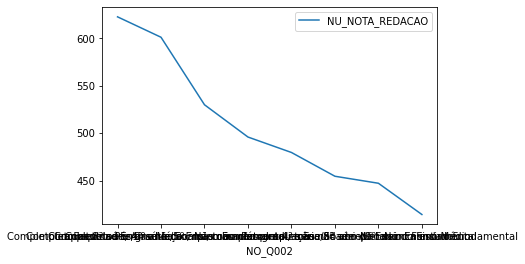

In [22]:
a.plot()

In [23]:
microdadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_REDACAO  ...        
                                                             count  ...     max
NO_Q001                                                             ...        
Completou a 4ª série/5º ano, mas não completou ...        549969.0  ...  1000.0
Completou a 8ª série/9º ano do Ensino Fundament...        460454.0  ...  1000.0
Completou a Faculdade, mas não completou a Pós-...        311918.0  ...  1000.0
Completou a Pós-graduação                                 187705.0  ...  1000.0
Completou o Ensino Médio, mas não completou a F...       1043472.0  ...  1000.0
Nunca estudou                                             200902.0  ...  1000.0
Não completou a 4ª série/5º ano do Ensino Funda...        813670.0  ...  1000.0
Não sei                                                   325653.0  ...   980.0

[8 rows x 8 columns]

utilizando o método WHERE do pandas

In [24]:
microdadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
.where(microdadosEnem.SG_UF_RESIDENCIA == 'RJ')\
.groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending = False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,671.556357
"Completou a Faculdade, mas não completou a Pós-graduação",640.166001
"Completou o Ensino Médio, mas não completou a Faculdade",551.854163
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",512.237069
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",493.775883
Não completou a 4ª série/5º ano do Ensino Fundamental,468.737647
Não sei,466.216894
Nunca estudou,422.815270


In [25]:
microdadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
.where(microdadosEnem.SG_UF_RESIDENCIA == 'SP')\
.groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending = False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,631.897240
"Completou a Faculdade, mas não completou a Pós-graduação",611.155591
"Completou o Ensino Médio, mas não completou a Faculdade",537.377448
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",505.548170
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.396846
Não completou a 4ª série/5º ano do Ensino Fundamental,466.911382
Não sei,464.232837
Nunca estudou,415.417750


In [26]:
microdadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
.where(microdadosEnem.SG_UF_RESIDENCIA == 'RS')\
.groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending = False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,630.012616
"Completou a Faculdade, mas não completou a Pós-graduação",605.029666
"Completou o Ensino Médio, mas não completou a Faculdade",541.048219
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",505.435124
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.664938
Não sei,468.037215
Não completou a 4ª série/5º ano do Ensino Fundamental,466.195520
Nunca estudou,419.815157


In [27]:
microdadosEnem.filter(items=['SG_UF_RESIDENCIA', 'NU_NOTA_REDACAO', 'NO_Q002'])\
.groupby(['SG_UF_RESIDENCIA', 'NO_Q002']).mean()

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q002                                                            
AC               Completou a 4ª série/5º ano, mas não completou ...       450.627015
                 Completou a 8ª série/9º ano do Ensino Fundament...       467.791390
                 Completou a Faculdade, mas não completou a Pós-...       534.755917
                 Completou a Pós-graduação                                556.451017
                 Completou o Ensino Médio, mas não completou a F...       481.718644
...                                                                              ...
TO               Completou a Pós-graduação                                573.382937
                 Completou o Ensino Médio, mas não completou a F...       485.402757
                 Nunca estudou                                            386.487730
                 Não completou a 4ª série/5º ano do Ensino Funda...       423.298339
                 Não sei                                                  428.539130

[216 rows x 1 columns]

utilizando o pacote matplotlib para visualizar a tendência dos dados

In [28]:
import matplotlib.pyplot as plt

Text(0.02, 0.65, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do Ensino Fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

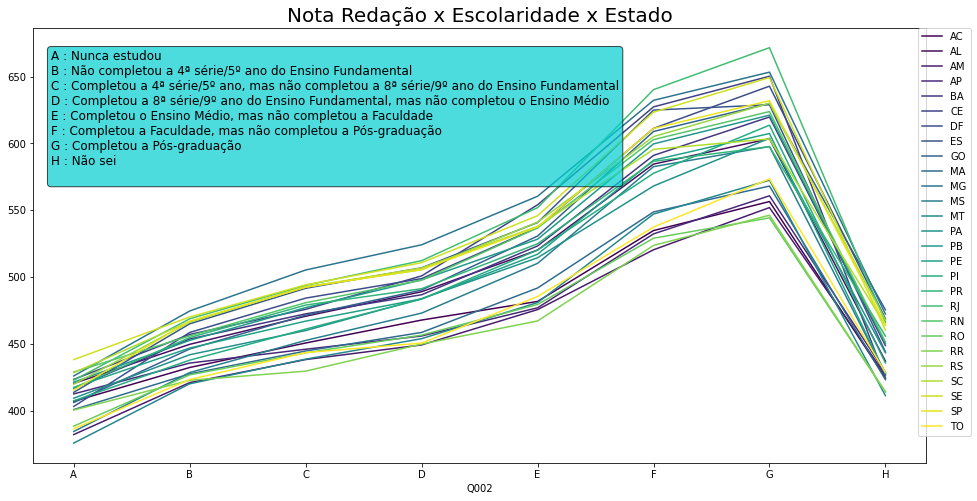

In [60]:
# fig, ax = plt.subplots(figsize=(16,8))
# plt.suptitle('Nota Redação x Escolaridade x Estado')

ax = microdadosEnem.filter(items=['SG_UF_RESIDENCIA', 'NU_NOTA_REDACAO', 'Q002'])\
.groupby(['Q002', 'SG_UF_RESIDENCIA']).mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
.unstack().plot(figsize=(16,8), colormap='viridis')
ax.set_title('Nota Redação x Escolaridade x Estado', fontsize=20)

handles, labels = ax.get_legend_handles_labels()
import re
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

textdictQ002 = ""
for key, value in q001e002Dicionario.items():
  textdictQ002 = textdictQ002 + "{key} : {value}\n".format(key=key,value=value)

ax.text(0.02, 0.65, textdictQ002, transform=ax.transAxes, fontsize=12,
        bbox={'boxstyle':'round', 'facecolor':'darkturquoise', 'alpha':0.7})